In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,levene,shapiro,probplot,ttest_ind,f_oneway
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import LabelEncoder
import copy
%matplotlib inline

In [2]:
data= pd.read_csv("insurance.csv")

In [22]:
# 3a)
data.shape

(1338, 8)

In [23]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197
5,31,female,25.740,0,no,southeast,3756.62160,8.231275
6,46,female,33.440,1,no,southeast,8240.58960,9.016827
7,37,female,27.740,3,no,northwest,7281.50560,8.893093
8,37,male,29.830,2,no,northeast,6406.41070,8.765054
9,60,female,25.840,0,no,northwest,28923.13692,10.272397


In [24]:
#3b)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [25]:
#3c)
data.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
log_charges    0
dtype: int64

In [7]:
#3d)
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


age
Skewness: 0.055610083072599126 

bmi
Skewness: 0.28372857291709386 

charges
Skewness: 1.5141797118745743 



<Figure size 432x288 with 0 Axes>

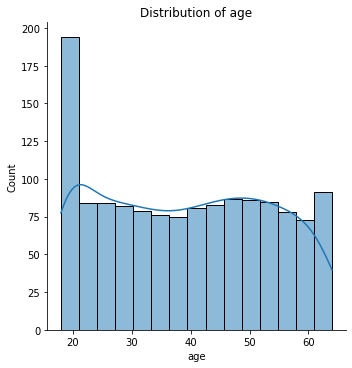

<Figure size 432x288 with 0 Axes>

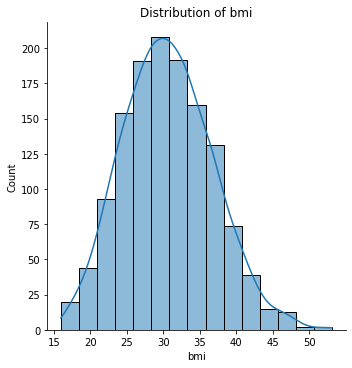

<Figure size 432x288 with 0 Axes>

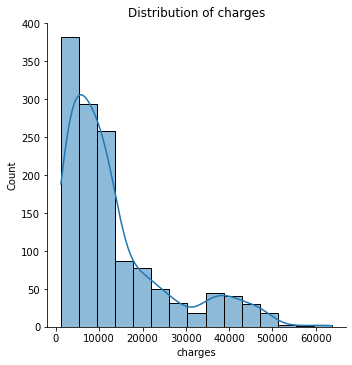

In [8]:
#3e) ploting distribution of  age,bmi,charges
#3f) calculating the measure of skewness

'''if -0.5< skewness <0.5 data fairly symmetrical
       -1< skewness <-0.5 or 0.5< skewness <1 , data moderately skewed
       skewness< -1 or skewness >1, data highly skewed
''' 
for col in ["age","bmi","charges"]:
    print(col)
    print("Skewness:",skew(data[col]),"\n")
    plt.figure();
    sns.displot(x=col,data=data,bins=15,kde=True);
    plt.title("Distribution of {}".format(col));



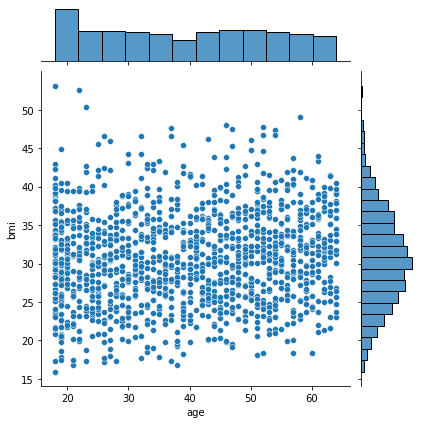

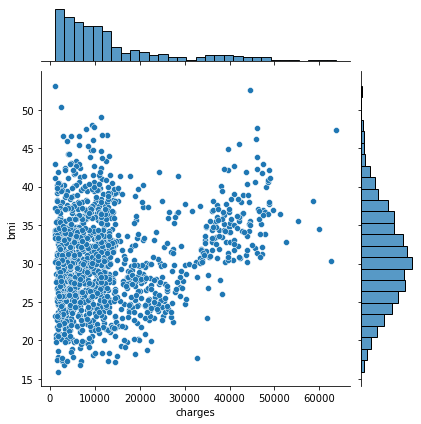

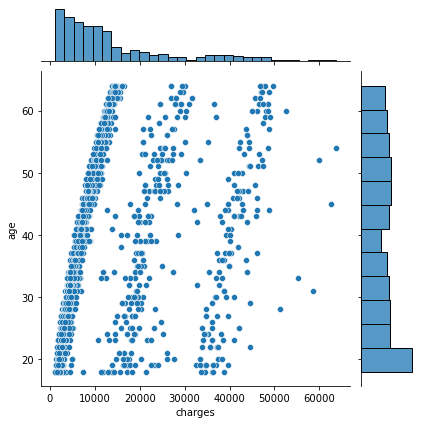

In [9]:

sns.jointplot(x="age",y="bmi",data=data);
sns.jointplot(x="charges",y="bmi",data=data)
sns.jointplot(x="charges",y="age",data=data)


1. Age seems almost uniformly distributed with very less skew
2. Bmi has fairly symetrical distribution
3. Charges is highly right skewed

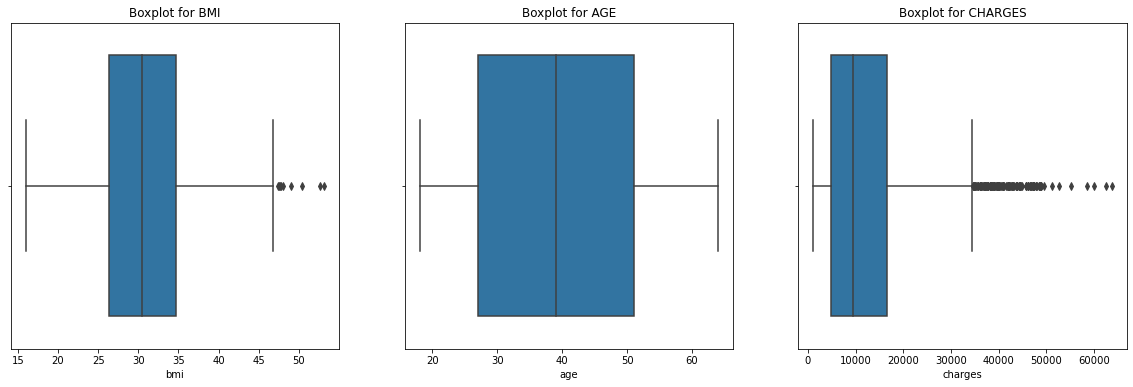

In [10]:
#3g)checking the presence of outliers 
fig, axes= plt.subplots(1,3,figsize=(20,6))  
sns.boxplot(x="bmi",data=data,ax=axes[0]);
sns.boxplot(x="age",data=data,ax=axes[1]);
sns.boxplot(x="charges",data=data,ax=axes[2]);
axes[0].title.set_text("Boxplot for BMI");
axes[1].title.set_text("Boxplot for AGE");
axes[2].title.set_text("Boxplot for CHARGES");



#### "Bmi" and "charges" have outliers but "age" seems uniformly distributed

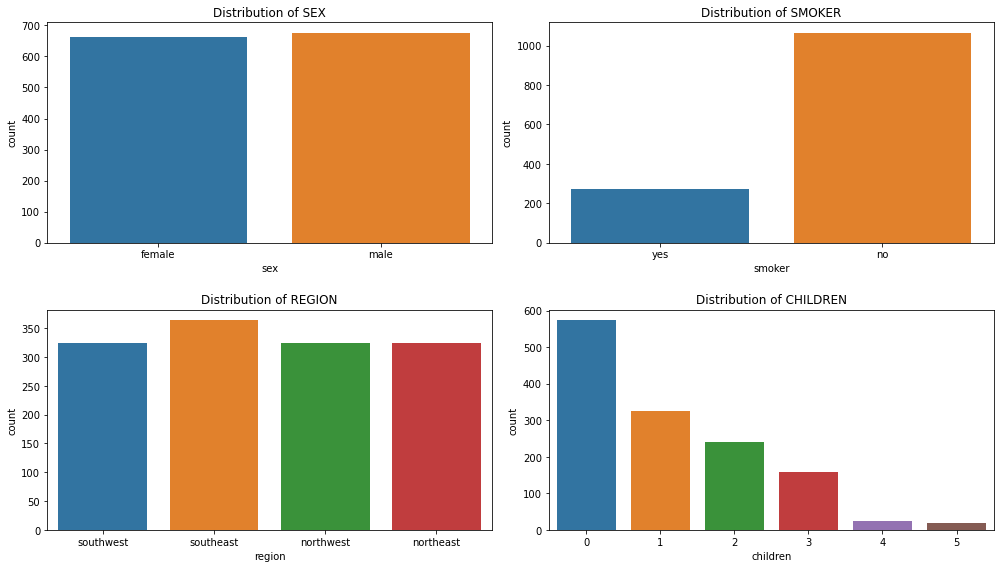

In [11]:
#3h)Distribution of categorical columns-univariate
fig , ax = plt.subplots(2,2,figsize=(14,8))
sns.countplot(x="sex",data=data,ax=ax[0][0]);
sns.countplot(x="smoker",data=data,ax=ax[0][1]);
sns.countplot(x="region",data=data,ax=ax[1][0]);
sns.countplot(x="children",data=data,ax=ax[1][1]);


ax[0][0].title.set_text("Distribution of SEX");
ax[0][1].title.set_text("Distribution of SMOKER");
ax[1][0].title.set_text("Distribution of REGION");
ax[1][1].title.set_text("Distribution of CHILDREN");
fig.tight_layout(h_pad=2)

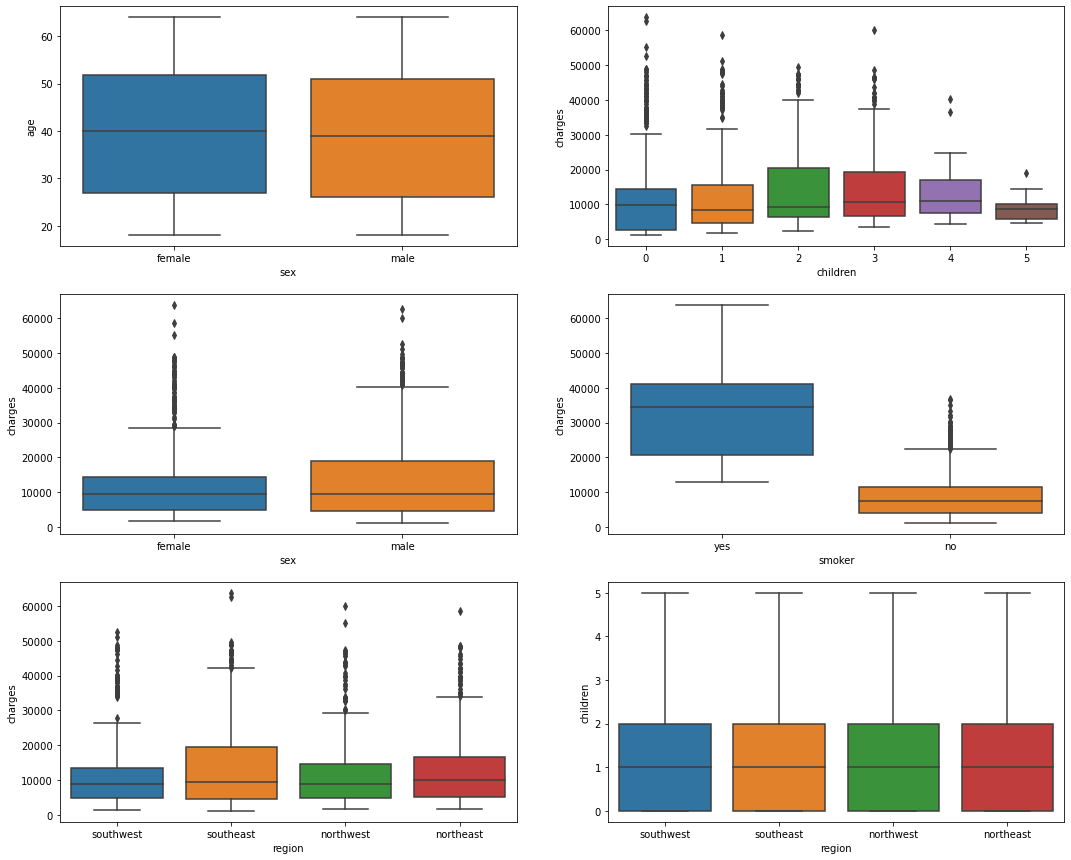

In [12]:
#3h) Categorical distribution plots:- bivariate
fig, ax= plt.subplots(3,2,figsize=(18,15))
sns.boxplot(x="sex",y="age",data=data,ax=ax[0][0]);
sns.boxplot(x="children",y="charges",data=data,ax=ax[0][1])
sns.boxplot(x="sex",y="charges",data=data,ax=ax[1][0])
sns.boxplot(x="smoker",y="charges",data=data,ax=ax[1][1])
sns.boxplot(x="region",y="charges",data=data,ax=ax[2][0])
sns.boxplot(x="region",y="children",data=data,ax=ax[2][1])


1. data has approximately 50% of population with same number of males and females with same age as well
2. smokers have paid higher charges and the data is right skewed.
3. male population has claimed insurance more often and as the data is right skewed it seems male smokers have paid more extreme charges
4. people with 2 children have claimed insurance more often but people with 0 children have paid extreme charges more often 
5. people with 5 children have claimed less often
6. though all the regions all extreme charge payers but people from south east region have paid extreme charges more often

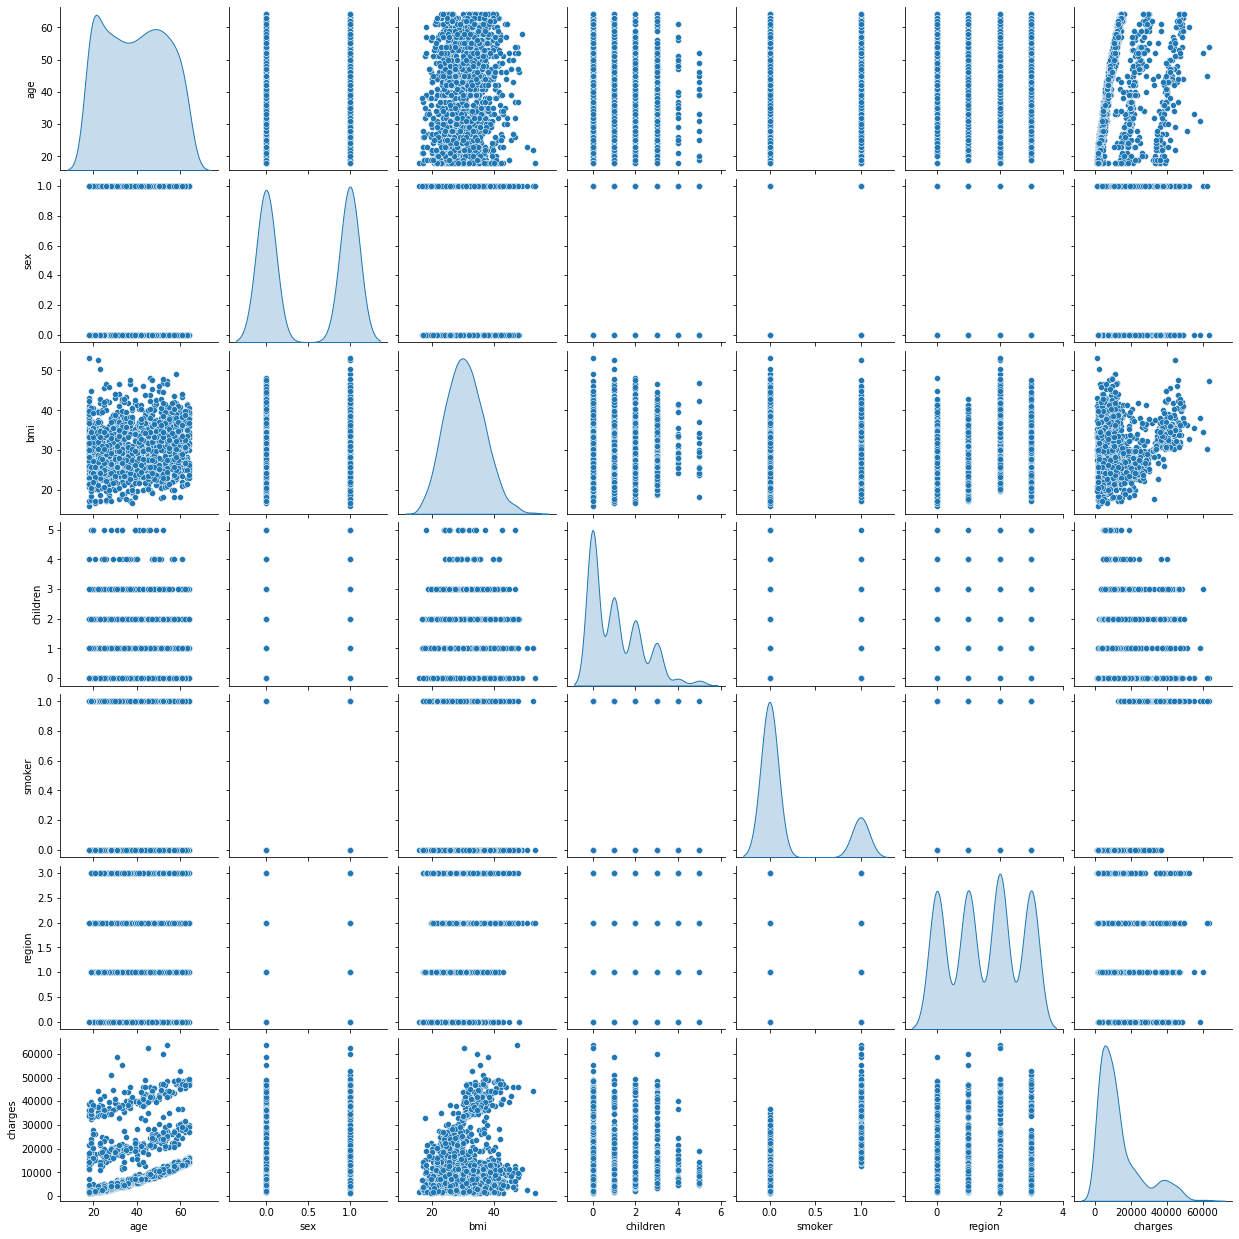

In [13]:
#3i) pairplot
data_encoded = copy.deepcopy(data)
data_encoded[['sex', 'smoker', 'region']] = data_encoded[['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(data_encoded,diag_kind="kde"); 




### 4a) Do charges of people who smoke differ significantly from the people who don't

skewness before: 1.5141797118745743 
 skewness after:-0.08999648706579093


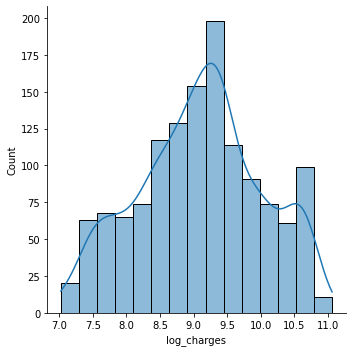

In [14]:
#detecting outliers
data["log_charges"]=np.log(data["charges"])
Q1=np.quantile(data["log_charges"],[.25])
Q3=np.quantile(data["log_charges"],[.75])
IQR=Q3-Q1
lower=Q1-IQR*1.5
higher=Q3+IQR*1.5
data_cleaned=data[(data["log_charges"]>lower[0]) & (data["log_charges"]<higher[0])]
data_cleaned.reset_index(drop=True,inplace=True)  
sns.displot(x="log_charges",data=data,bins=15,kde=True);
print("skewness before: {} \n skewness after:{}".format(skew(data["charges"]),skew(data["log_charges"])))



RESULT:Two groups have different variance
RESULT:Sample doesn't seem to be normally distributed


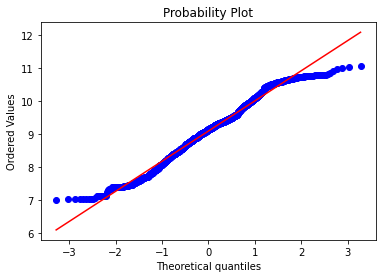

In [15]:
#dividing smoker and nom smoker group
smoker=np.array(data[data["smoker"]=="yes"]["log_charges"])
non_smoker=np.array(data[data["smoker"]=="no"]["log_charges"])

#test for variance

def variance_test(grp1,grp2,alpha=0.05):
    statistic,p_value=levene(grp1,grp2,center="median")
    if p_value<alpha:
       print("RESULT:Two groups have different variance")
    else:
       print("RESULT:Two groups have same variance")

variance_test(smoker,non_smoker) 

#test for normality

def test_normality(sample,alpha=0.05):
    stats,p =shapiro(sample)
    if p < 0.05:
        print("RESULT:Sample doesn't seem to be normally distributed")
    else:
        print("RESULT:Sample seem to be normally distributed")

test_normality(data["log_charges"])

probplot(data["log_charges"],plot=plt)
plt.show()

1. individual Samples dont have normal distribution but the population seems to be slightly normal so considering CLT   
   if repeated samples will be taken then sample distribution will eventually converge to normal
2. Because of unequal variance we will use welch t-test   

In [16]:
#Do charges of people who smoke differ significantly from the people who don't
#H0: charges of people who smoke are same from the people who don't
#H1: charges of people who smoke are not same from the people who don't

alpha=0.05
stats,p_value =ttest_ind(smoker, non_smoker,equal_var=False)
if p_value<0.05:
    print("RESULT:charges of people who smoke are not same from the people who don't")
else:
    print("RESULT:charges of people who smoke are same from the people who don't")

RESULT:charges of people who smoke are not same from the people who don't


### 4b) Does bmi of males differ significantly from that of females? 

In [1]:
#Does bmi of males differ significantly from that of females? 
bmi_males=np.array(data[data["sex"]=="male"]['bmi'])
bmi_females=np.array(data[data["sex"]=="female"]['bmi'])

#test for variance and normality
variance_test(bmi_males,bmi_females)
test_normality(data["bmi"])
shapiro(data["bmi"])

NameError: name 'np' is not defined

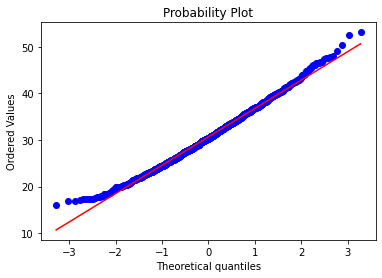

In [18]:
probplot(data["bmi"],plot=plt)
plt.show()

### data seems normaly distributed and both groups have equal variance

In [19]:
#H0: Bmi of both the males and females is same
#H1: Bmi of males and females is not same
stats, p_value= ttest_ind(bmi_males,bmi_females)
alpha=0.05
if p_value<alpha:
    print("RESULT:Bmi of males and females is not same")
else:
    print("RESULT: Bmi of both the males and females is same ")

RESULT: Bmi of both the males and females is same 


### 4c) Is the proportion of smokers significantly different in different genders? 

In [20]:
#Is the proportion of smokers significantly different in different genders? 
#H0:The proportions are equal
#H1:The proportions are not equal
femalesmokers=data[data["sex"]=="female"]["smoker"].value_counts()[1]
malesmokers=data[data["sex"]=="male"]["smoker"].value_counts()[1]
n_females=(data["sex"]=="female").value_counts()[1]
n_males=(data["sex"]=="male").value_counts()[1]

stat, p_value= proportions_ztest([femalesmokers,malesmokers],[n_females,n_males],alternative="two-sided")
if p_value<0.05:
    print("RESULT: The proportions are not same")
else:
    print("RESULT: The proportions are same")

RESULT: The proportions are not same


### 4d) Is the distribution of bmi across women with no children, one child and two children, the same

In [ ]:
#Is the distribution of bmi across women with no children, one child and two children, the same
#h0:the distribution of bmi across women with no children, one child and two children, the same
#h1:the distribution of bmi across women with no children, one child and two children, is not  same
female_0=data[(data["children"]==0)& (data["sex"]=="female")]["bmi"]
female_1=data[(data["children"]==1)& (data["sex"]=="female")]["bmi"]
female_2=data[(data["children"]==0)& (data["sex"]=="female")]["bmi"]

stats, p_val=f_oneway(hbfemale_0,female_1,female_2)
if p_val<0.05:
    print("RESULT:the distribution of bmi across women with no children, one child and two children, is not  same")
else:
    print("RESULT:the distribution of bmi across women with no children, one child and two children, is  same")

In [27]:
type(female_0)

pandas.core.series.Series